In [84]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

In [85]:
class Parameters(object):
    pass

param = Parameters()
param.beta = 10
param.m = 1
param.k = 20
param.x_fin = 1
param.P_coef = 20
param.I_coef = 200
param.D_coef = 20
param.integral = 0
param.control = 0
param.prev_e = 1


In [86]:
sim_param = Parameters()
sim_param.t0 = 0
sim_param.tf = 10
sim_param.dt = 0.01

In [87]:
def control(e, p = param):
    p.integral += e * sim_param.dt
    f = p.P_coef * e + p.I_coef * p.integral + p.D_coef * (e - p.prev_e) / sim_param.dt
    p.prev_e = e
    return f

def ode(t, x, p = param):
    r = x[0]
    v = x[1]
    f = p.control

    dxdt = np.zeros(2)
    dxdt[0] = v
    dxdt[1] = 1 / p.m * (f - p.beta * v - p.k * r)
    return dxdt

In [88]:
x_list = []
x_sol = [0, 0]

t_sol = np.arange(sim_param.t0, sim_param.tf, sim_param.dt)

t = 0.
while t < sim_param.tf:
    sol = sci.solve_ivp(ode, (t, t + sim_param.dt), x_sol)
    t += sim_param.dt
    x_sol = sol.y.T[-1, :]
    x_list.append(x_sol[0])
    param.control = control((param.x_fin - x_list[-1]), param)


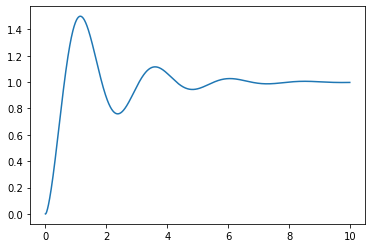

In [89]:
plt.figure()
plt.plot(t_sol, x_list[:len(t_sol)])
